ADVERSTISING SALES CHANNEL DATASET

In [94]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [95]:
adv=pd.read_csv('advertisement.csv',sep='\t')
adv

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9
...,...,...,...,...
196,38.2,3.7,13.8,7.6
197,94.2,4.9,8.1,9.7
198,177.0,9.3,6.4,12.8
199,283.6,42.0,66.2,25.5


In [96]:
df=pd.DataFrame(adv)
df.head()

,TV,radio,newspaper,sales
1,230.1,37.8,69.2,22.1
2,44.5,39.3,45.1,10.4
3,17.2,45.9,69.3,9.3
4,151.5,41.3,58.5,18.5
5,180.8,10.8,58.4,12.9


In [97]:
df.isnull().sum()

TV           0
radio        0
newspaper    0
sales        0
dtype: int64

In [98]:
df.describe()

,TV,radio,newspaper,sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


<AxesSubplot:>

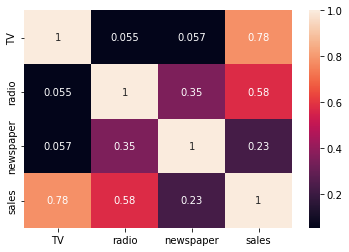

In [99]:
sns.heatmap(df.corr(),annot=True)

In [100]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [101]:
def vif(x1):
    vif=pd.DataFrame()
    vif['variables']=x1.columns
    vif['vif_factor']=[variance_inflation_factor(x1.values,i) for i in range(x1.shape[1])]
    return vif

In [102]:
vif(df)

,variables,vif_factor
0,TV,23.198876
1,radio,12.570312
2,newspaper,3.153498
3,sales,55.303920


In [103]:
df_new=df.drop('TV',axis=1)

In [104]:
vif(df_new)

,variables,vif_factor
0,radio,5.603259
1,newspaper,3.140226
2,sales,5.928228


In [105]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error

In [106]:
x=df.drop('sales',axis=1)
y=df['sales']

In [107]:
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=.7,random_state=33)


In [108]:
ln=LinearRegression()
ln.fit(x_train,y_train)
pred_ln=ln.predict(x_test)
score=ln.score(x_train,y_train)
print("score: ",score)
print(" r2score :",r2_score(y_test,pred_ln))
print("mean squared error: ",mean_squared_error(y_test,pred_ln))
print("error: ",np.sqrt(mean_squared_error(y_test,pred_ln)))

score:  0.8795791836220443
 r2score : 0.927779550143889
mean squared error:  2.1808858614737816
error:  1.4767822661021432


In [111]:
#taking input from the user
print("enter the amount you will invest on ")
tv=float(input("tv :"))

radio=float(input("radio"))
newspaper=float(input("newspaper"))
#getting the predicted sales
data=[tv,radio,newspaper]
data=np.reshape(data,(1,-1))
sales=ln.predict(data)
print("the predicted sales will be: ",sales)

enter the amount you will invest on 
tv :283.6
radio42.0
newspaper66.2
the predicted sales will be:  [23.96764713]


In [110]:
data

array([[17.2, 45.9, 69.3]])

In [117]:
import pickle

sales_pred=pickle.dumps(ln)

In [118]:
ln_pickle=pickle.loads(sales_pred)
ln_pickle

LinearRegression()